(1024,)


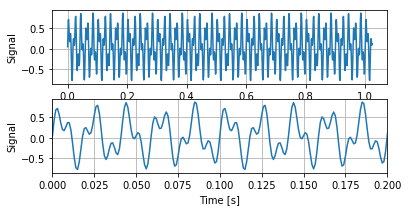

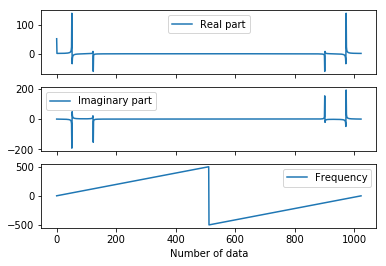

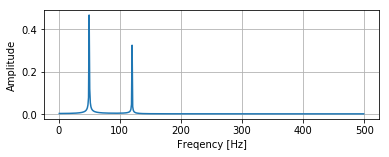

In [11]:
import numpy as np
import matplotlib.pyplot as plt

N = 1024            # サンプル数
dt = 0.001          # サンプリング周期 [s]
f1, f2 = 50, 120    # 周波数 [Hz]

t = np.arange(0, N*dt, dt) # 時間 [s]
x = (1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t))/3+0.05# 信号
print(x.shape)
sf.write('2.wav', np.hstack([x,x,x,x,x]), int(1.0/dt))

fig, ax = plt.subplots(2, figsize=(6,3))
ax[0].plot(t, x)
ax[0].set_xlabel("Time [s]"); ax[0].set_ylabel("Signal"); ax[0].grid()
ax[1].plot(t, x); ax[1].set_xlim(0, 0.2)
ax[1].set_xlabel("Time [s]"); ax[1].set_ylabel("Signal"); ax[1].grid()
plt.show()

F = np.fft.fft(x) # 変換結果
freq = np.fft.fftfreq(N, d=dt) # 周波数

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,4))
ax[0].plot(F.real, label="Real part"); ax[0].legend()
ax[1].plot(F.imag, label="Imaginary part"); ax[1].legend()
ax[2].plot(freq, label="Frequency"); ax[2].legend()
ax[2].set_xlabel("Number of data"); plt.show()

Amp = np.abs(F/(N/2)) # 振幅

fig, ax = plt.subplots(figsize=(6,2))
ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
ax.set_xlabel("Freqency [Hz]"); ax.set_ylabel("Amplitude"); ax.grid(); plt.show()
# sf.write('2.wav', np.hstack([x,x,x,x,x]), rate)

(1024,)


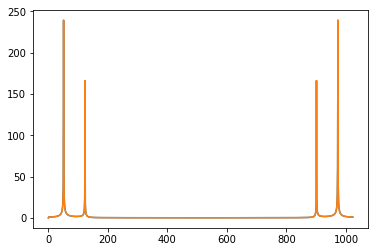

(1024,)


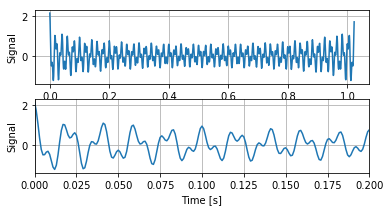

In [12]:
H = np.zeros((N,), dtype=np.complex)

H[:int(N/2)] = Amp[:int(N/2)]*(N/2)
H[int(N/2):] = Amp[int(N/2):0:-1]*(N/2)
H.real[0]= 0
H.imag = H.real
plt.plot(H.real)
plt.plot(H.imag)
print(H.shape)
plt.show()


G = np.fft.ifft(H)
print(G.shape)

G = G.real

sf.write('amp-amp.wav', np.hstack([G,G,G,G,G]), int(1.0/dt))

fig, ax = plt.subplots(2, figsize=(6,3))
ax[0].plot(t, G)
ax[0].set_xlabel("Time [s]"); ax[0].set_ylabel("Signal"); ax[0].grid()
ax[1].plot(t, G); ax[1].set_xlim(0, 0.2)
ax[1].set_xlabel("Time [s]"); ax[1].set_ylabel("Signal"); ax[1].grid()
plt.show()

(48000,) 48000


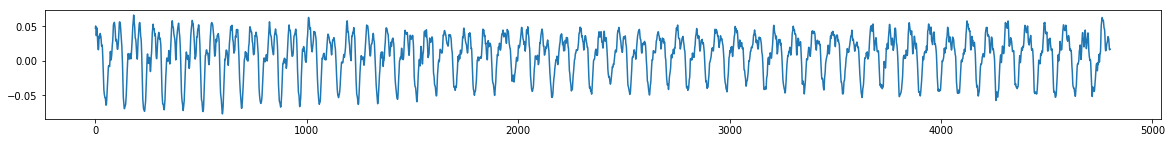

In [169]:
wavfile = "./data/d.wav"
data1, rate = sf.read(wavfile)
print(data1.shape, rate)
data1 = data1[:4800]
plt.figure(figsize=(20,2));plt.plot(data1);plt.show()

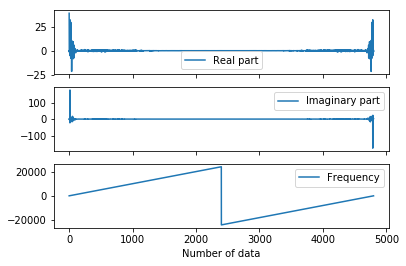

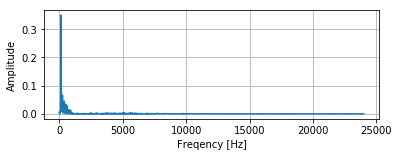

(4800,)


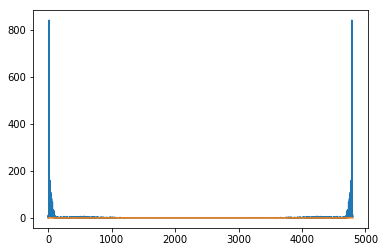

(4800,)


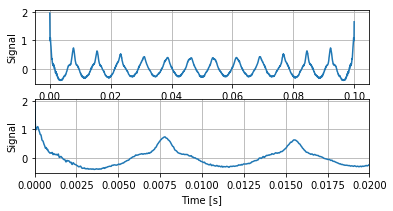

In [127]:
F = np.fft.fft(data1) # 変換結果
freq = np.fft.fftfreq(len(data1), d=1.0/rate) # 周波数

t = np.arange(0, len(data1)*1.0/rate, 1.0/rate) # 時間 [s]

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,4))
ax[0].plot(F.real, label="Real part"); ax[0].legend()
ax[1].plot(F.imag, label="Imaginary part"); ax[1].legend()
ax[2].plot(freq, label="Frequency"); ax[2].legend()
ax[2].set_xlabel("Number of data"); plt.show()

Amp = np.abs(F/(N/2)) # 振幅

fig, ax = plt.subplots(figsize=(6,2))
ax.plot(freq[1:int(len(data1)/2)], Amp[1:int(len(data1)/2)])
ax.set_xlabel("Freqency [Hz]"); ax.set_ylabel("Amplitude"); ax.grid(); plt.show()
sf.write('aaa.wav', np.hstack([data1,data1,data1,data1,data1]), rate)

H = np.zeros((len(data1),), dtype=np.complex)

H[:int(len(data1)/2)] = Amp[:int(len(data1)/2)]*(len(data1)/2)
H[int(len(data1)/2):] = Amp[int(len(data1)/2):0:-1]*(len(data1)/2)
H.real[0]= 0
H.imag = 0#H.real
plt.plot(H.real)
plt.plot(H.imag)
print(H.shape)
plt.show()


# G = np.fft.ifft(F)
G = np.fft.ifft(H)
print(G.shape)

G = G.real

sf.write('bbb.wav', np.hstack([G,G,G,G,G]), rate)

fig, ax = plt.subplots(2, figsize=(6,3))
ax[0].plot(t, G)
ax[0].set_xlabel("Time [s]"); ax[0].set_ylabel("Signal"); ax[0].grid()
ax[1].plot(t, G); ax[1].set_xlim(0, 0.02)
ax[1].set_xlabel("Time [s]"); ax[1].set_ylabel("Signal"); ax[1].grid()
plt.show()

In [128]:
sf.write('ccc.wav', np.hstack([data1,data1,data1,data1,data1]), rate)

F = np.fft.fft(data1) # 変換結果
freq = np.fft.fftfreq(len(data1), d=1.0/rate) # 周波数

t = np.arange(0, len(data1)*1.0/rate, 1.0/rate) # 時間 [s]

Amp = np.abs(F/(len(data1)/2)) # 振幅

H = np.zeros((len(data1),), dtype=np.complex)

H[:int(len(data1)/2)] = Amp[:int(len(data1)/2)]*(len(data1)/2)
H[int(len(data1)/2):] = Amp[int(len(data1)/2):0:-1]*(len(data1)/2)
H.real[0]= 0
H.imag = H.real

G = np.fft.ifft(H)
G = G.real

sf.write('ddd.wav', np.hstack([G,G,G,G,G]), rate)

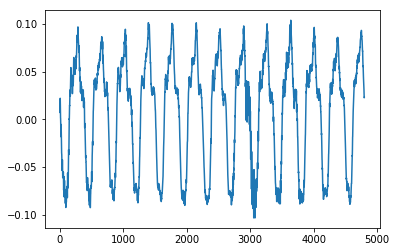

In [129]:
plt.plot(data1)

In [151]:
def spectrum_reconst2(f, rate=48000):
    sf.write('ccc.wav', np.hstack([f,f,f,f,f]), rate)

    
#     F = np.fft.fft(f*humming(len(f))) # 変換結果
    F = np.fft.fft(f) # 変換結果
    freq = np.fft.fftfreq(len(f), d=1.0/rate) # 周波数
    Amp = np.abs(F/(len(f)/2)) # 振幅
    
    print("fourier amp");plt.figure(figsize=(10,2));plt.plot(Amp[:600]); plt.show()
    print("fourier amp log");plt.figure(figsize=(10,2));plt.plot(np.log(Amp[:600]/(2*1e-5))); plt.show()
    print("fourier real imag");plt.figure(figsize=(10,2));plt.plot(F.real[:600]); plt.plot(F.imag[:600]); plt.show()
    
    a = np.where(F.real[:600]>0, F.real[:600], 0)
    b = np.where(F.imag[:600]>0, F.imag[:600], 0)
    print("fourier real imag log");plt.figure(figsize=(10,2));plt.plot(np.log(a/(2*1e-5))); plt.plot(np.log(b/(2*1e-5))); plt.show()
    print("fourier theta");plt.figure(figsize=(10,2));plt.plot(np.arctan(F.imag[:600]/F.real[:600])); plt.show()
    
    
    H = np.zeros((len(f),), dtype=np.complex)
    
    H.real[:int(len(f)/2)] = Amp[:int(len(f)/2)]*(len(f)/2)
    H.real[int(len(f)/2):] = Amp[int(len(f)/2):0:-1]*(len(f)/2)
    H.real[0] = 0
    
    H.imag[:int(len(f)/2)] = Amp[:int(len(f)/2)]*(len(f)/2)
    H.imag[int(len(f)/2):] = -Amp[int(len(f)/2):0:-1]*(len(f)/2)
#     H.imag = 0#H.real
    
    plt.figure(figsize=(10,2))
    plt.plot(H.real)
    plt.plot(H.imag)
    plt.show()
#     H.real[0]= F.real[0]
#     H.imag[0]= F.imag[0]

    G = np.fft.ifft(H)
    G = G.real

    plt.plot(G); plt.show()
    
    x = np.hstack([G,G,G,G,G])
    plt.figure(figsize=(20,3))
    plt.plot(x)
    plt.show()
    a = G[-40:] # 古いデータの尻。(40, 2)
    b = G[:40] # 新しいデータの頭。(40, 2)
    G[-40:] = connect(a,b) # 尻を上書き
    
    G = G[40:]
    
    x = np.hstack([G,G,G,G,G])
    plt.figure(figsize=(20,3))
    plt.plot(x)
    plt.show()
    sf.write('eee.wav', np.hstack([G,G,G,G,G]), rate)

fourier amp


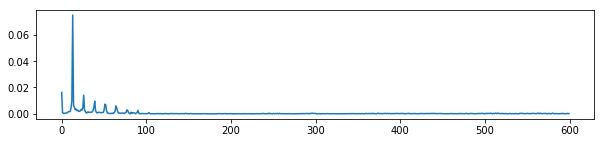

fourier amp log


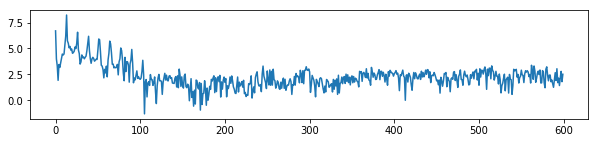

fourier real imag


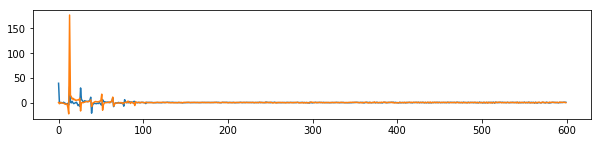

fourier real imag log


/home/nama/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/home/nama/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


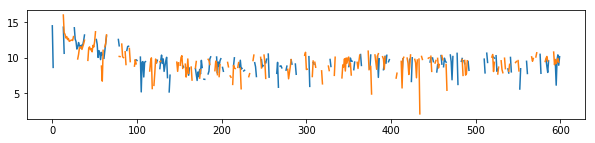

fourier theta


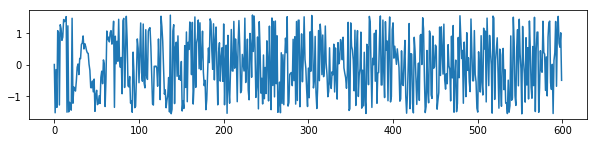

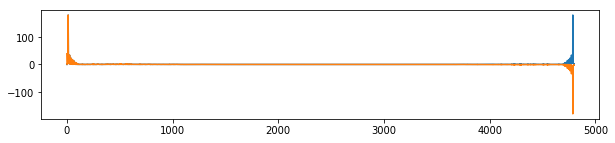

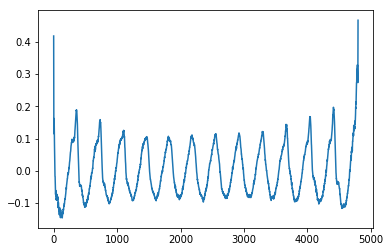

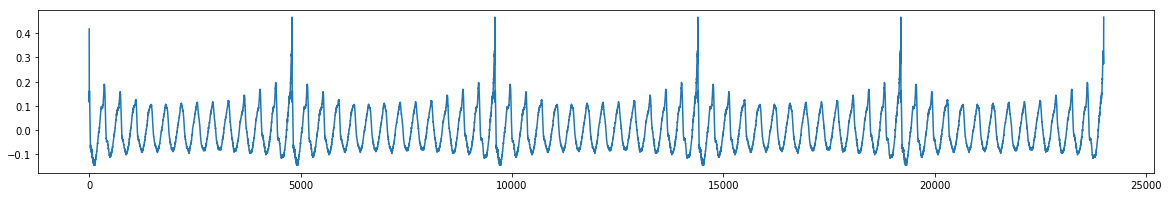

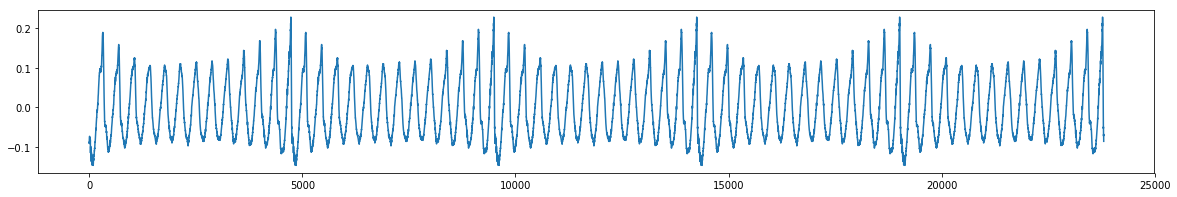

In [149]:
spectrum_reconst2(data1)

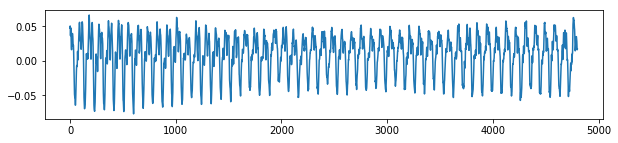

(800,)


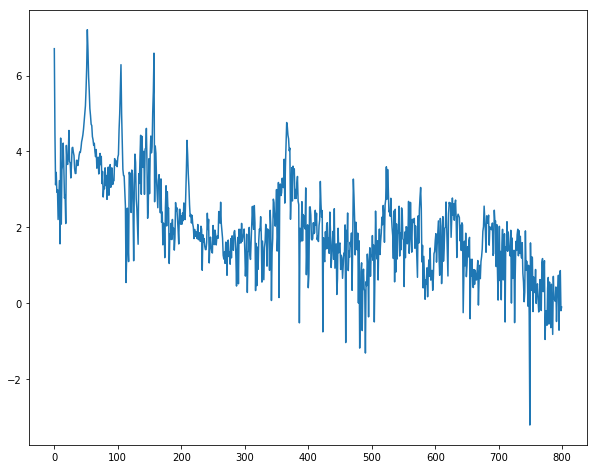

In [174]:
def spectrum(f, rate=48000):
    F = np.fft.fft(f)
    freq = np.fft.fftfreq(len(f), d=1.0/rate) # 周波数
    amp = np.abs(F/(len(f)/2)) # 振幅
    spe = np.log(amp/(2*1e-5))
    return spe[:int(len(spe)/2/3)] # 8kHzまでとする

plt.figure(figsize=(10,2)); plt.plot(data1); plt.show()
spe = spectrum(data1)
print(spe.shape)
plt.figure(figsize=(10,8)); plt.plot(spe); plt.show()

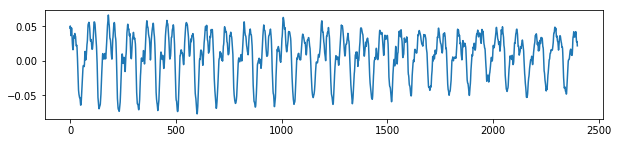

(400,)


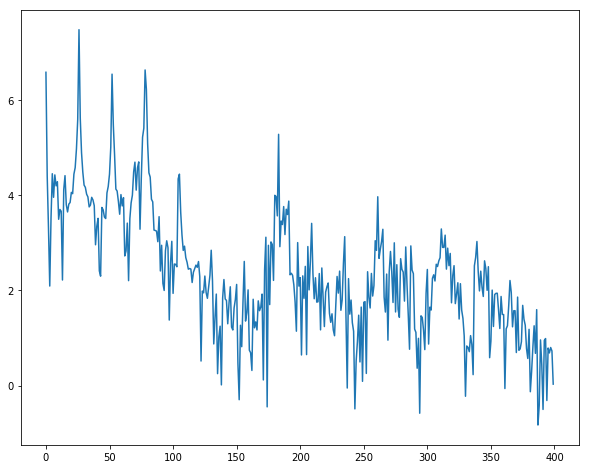

In [175]:
def spectrum(f, rate=48000):
    F = np.fft.fft(f)
    freq = np.fft.fftfreq(len(f), d=1.0/rate) # 周波数
    amp = np.abs(F/(len(f)/2)) # 振幅
    spe = np.log(amp/(2*1e-5))
    return spe[:int(len(spe)/2/3)] # 8kHzまでとする

plt.figure(figsize=(10,2)); plt.plot(data1[:2400]); plt.show()
spe = spectrum(data1[:2400])
print(spe.shape)
plt.figure(figsize=(10,8)); plt.plot(spe); plt.show()

In [ ]:
# imag ひっくりかえｒす

In [5]:
import soundfile as sf
import os

path = "../VoiceData/tamaneuta/trim_data/"
files = sorted(os.listdir(path))
files = [path + file for file in files]
files

['../VoiceData/tamaneuta/trim_data/utama1.wav',
 '../VoiceData/tamaneuta/trim_data/utama2.wav',
 '../VoiceData/tamaneuta/trim_data/utama3.wav',
 '../VoiceData/tamaneuta/trim_data/utama4.wav',
 '../VoiceData/tamaneuta/trim_data/utama5.wav',
 '../VoiceData/tamaneuta/trim_data/utama6.wav',
 '../VoiceData/tamaneuta/trim_data/utama7.wav',
 '../VoiceData/tamaneuta/trim_data/utama8.wav',
 '../VoiceData/tamaneuta/trim_data/utama9.wav']

In [6]:
from data_loader import DataLoaderforReconstOpt, DataLoaderforLatentOpt, DataLoaderforVocoder
from utils import connect

from tqdm import tqdm

data_loader_voc = DataLoaderforVocoder(files)

ae_data = []

print("autoencoding...")

for fi in range(1):
    batch_size = 128
    data, amp = data_loader_voc.load(fi)

    for index in tqdm(range(0, len(data), batch_size)):
        batch_data = data[index:index+batch_size]
        batch_amp = amp[index:index+batch_size]
        _ae_data = sess.run(decoded, {inputs: batch_data})
        if not _ae_data.shape == (batch_size, 1600,2):
            continue
        ae_data.extend(_ae_data*batch_amp.reshape(-1,1,1))       

ae_data = np.array(ae_data)
print("ae_data.shape ==", ae_data.shape)

print("connecting...")

concat_data = [ae_data[0, 60:-20]]

for _ae_data in tqdm(ae_data[1:]):
    _ae_data = _ae_data[20:-20] # 新しいデータ。最初と最後は切り捨てておく。(1560, 2)
    a = concat_data[-1][-40:] # 古いデータの尻。(40, 2)
    b = _ae_data[:40] # 新しいデータの頭。(40, 2)
    concat_data[-1][-40:,0] = connect(a[:,0],b[:,0]) # 古いデータを上書き
    concat_data[-1][-40:,1] = connect(a[:,1],b[:,1]) # 古いデータを上書き
    
    concat_data.append(_ae_data[40:])

print("writing...")

concat_data = np.array(concat_data).reshape(-1, data_dim)
sf.write("sample/2_ae-long-3ep.wav", concat_data, rate)

print("done")

autoencoding...


  0%|          | 0/54 [00:00<?, ?it/s]


NameError: name 'sess' is not defined